In [1]:
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import matplotlib.pylab as plt
import torchvision.transforms.functional as TF
import numpy as np
import random
from PIL import Image, ImageDraw
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import matplotlib.pylab as plt
import torchvision.transforms.functional as TF
import numpy as np
import random
from PIL import Image, ImageDraw
from torch import optim
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import matplotlib.pylab as plt
import torchvision.transforms.functional as TF
import numpy as np
import random
from PIL import Image, ImageDraw
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import matplotlib.pylab as plt
import torchvision.transforms.functional as TF
import numpy as np
import random
from PIL import Image, ImageDraw
from torch import optim

#data_dir = "D:/2024_pc/skin_cancer_segmentation/Clinical Images_vipin/RGB_macro_images_and_GT/Waterloo/train_gray_256/"
#mask_dir="D:/2024_pc/skin_cancer_segmentation/Clinical Images_vipin/RGB_macro_images_and_GT/Waterloo/train_mask_256/"


data_dir = "d:/2024_pc/skin_cancer_segmentation/ISIC_2016/train_gray/"
mask_dir="d:/2024_pc/skin_cancer_segmentation/ISIC_2016/train_mask/"
imgsList=[pp for pp in os.listdir(data_dir)]
anntsList2=[pp for pp in os.listdir(mask_dir)]
print("number of images:", len(imgsList))
print("number of annotations:", len(anntsList2))
from albumentations import (HorizontalFlip,VerticalFlip,Compose,Resize)
h,w=256,256
#transform_train = Compose([ Resize(h,w),HorizontalFlip(p=0.5),VerticalFlip(p=0.5),])
transform_train = Compose([ Resize(h,w)])
transform_val = Resize(h,w)
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms.functional import to_tensor
#from torchvision.transforms.functional import to_pil_image
from torchvision import transforms, datasets, models
h, w= 256,256
transform_train = Compose([Resize(h,w)])
transform_val = Compose([Resize(h,w)])

class fetal_dataset(Dataset):
    def __init__(self, path2data,path2label,num_class, transform=None):
        imgsList=[pp for pp in sorted(os.listdir(path2data))]
        anntsList=[pp for pp in sorted(os.listdir(path2label))]
        self.path2imgs = [os.path.join(path2data, fn) for fn in imgsList]
        self.path2annts= [os.path.join(path2label, fn) for fn in anntsList]
        self.transform = transform
        self.num_class = num_class

    def __len__(self):
        return len(self.path2imgs)
 
    def __getitem__(self, idx):
        path2img = self.path2imgs[idx]
        image = Image.open(path2img)
        path2annt = self.path2annts[idx]
        mask = Image.open(path2annt)
        image= np.array(image)
        mask=np.asarray(mask)

        if self.transform: 
            augmented = self.transform(image=image, mask=mask )
            image = augmented['image']
            mask = augmented['mask']
            mask=mask.astype(np.float32)
            
        image= to_tensor(image)   
        mask=to_tensor(mask)
        mask=mask/torch.max(mask)

        return image, mask

fetal_ds_train = fetal_dataset(data_dir,mask_dir,1, transform=transform_train)
fetal_ds_val = fetal_dataset(data_dir,mask_dir,1, transform=transform_val)
from sklearn.model_selection import ShuffleSplit
from torch.utils.data import Subset
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
indices=range(len(fetal_ds_train))
for train_index, val_index in ss.split(indices):
    print(len(train_index))
    print(len(val_index))

train_dataset=Subset(fetal_ds_train,train_index)
val_dataset=Subset(fetal_ds_val,val_index)

number of images: 900
number of annotations: 900


C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


720
180


In [2]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional
import torch.nn.functional as F
def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )
def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

h,w=256,256
def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)
def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )



class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
            residual = x

            out = self.conv1(x)
            out = self.bn1(out)
            out = self.relu(out)

            out = self.conv2(out)
            out = self.bn2(out)

            if self.downsample is not None:
                residual = self.downsample(x)

            out += residual
            out = self.relu(out)

            return out



class ConvBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super().__init__()
        self.conv = nn.Sequential(
                                  nn.Conv2d(ch_in, ch_out,
                                            kernel_size=3, stride=1,
                                            padding=1, bias=True),
                                  nn.BatchNorm2d(ch_out),
                                  nn.ReLU(inplace=True),
                                  nn.Conv2d(ch_out, ch_out,
                                            kernel_size=3, stride=1,
                                            padding=1, bias=True),
                                  nn.BatchNorm2d(ch_out),
                                  nn.ReLU(inplace=True),
        )
        
    def forward(self, x):
        x = self.conv(x)
        return x

class UpConvBlock(nn.Module):
    def __init__(self, ch_in, ch_out):
        super().__init__()
        self.up = nn.Sequential(
                                nn.Upsample(scale_factor=2),
                                nn.Conv2d(ch_in, ch_out,
                                         kernel_size=3,stride=1,
                                         padding=1, bias=True),
                                nn.BatchNorm2d(ch_out),
                                nn.ReLU(inplace=True),
        )
        
    def forward(self, x):
        x = x = self.up(x)
        return x

class AttentionBlock(nn.Module):
    def __init__(self, f_g, f_l, f_int):
        super().__init__()
        
        self.w_g = nn.Sequential(
                                nn.Conv2d(f_g, f_int,
                                         kernel_size=1, stride=1,
                                         padding=0, bias=True),
                                nn.BatchNorm2d(f_int)
        )
        
        self.w_x = nn.Sequential(
                                nn.Conv2d(f_l, f_int,
                                         kernel_size=1, stride=1,
                                         padding=0, bias=True),
                                nn.BatchNorm2d(f_int)
        )
        
        self.psi = nn.Sequential(
                                nn.Conv2d(f_int, 1,
                                         kernel_size=1, stride=1,
                                         padding=0,  bias=True),
                                nn.BatchNorm2d(1),
                                nn.Sigmoid(),
        )
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, g, x):
        g1 = self.w_g(g)
        x1 = self.w_x(x)
        psi = self.relu(g1+x1)
        psi = self.psi(psi)
        
        return psi*x





        
class LeSegGAN(nn.Module):

    def __init__(self, block, layers, params,num_outputs=1):
        self.inplanes = 64
        super(LeSegGAN, self).__init__()
        C_in, H_in, W_in=params["input_shape"]
        init_f=params["initial_filters"]
        num_outputs=params["num_outputs"]
        self.conv1 = nn.Conv2d(1, init_f, kernel_size=7, stride=1, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(init_f)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, init_f, layers[0])
        self.layer2 = self._make_layer(block, 2*init_f, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 4*init_f, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 8*init_f, layers[3], stride=2)
        self.layer5 = self._make_layer(block, 8*init_f, layers[4], stride=2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv_up3 = convrelu(8*init_f + 8*init_f, 8*init_f, 3, 1)
        self.att5 = AttentionBlock(f_g=512, f_l=512, f_int=256)
        self.conv_up2 = convrelu(8*init_f + 4*init_f, 4*init_f, 3, 1)
        self.up4 = UpConvBlock(ch_in=512, ch_out=256)
        self.att4 = AttentionBlock(f_g=256, f_l=256, f_int=128)
        self.up3 = UpConvBlock(ch_in=512, ch_out=256)
        self.upconv3 = ConvBlock(ch_in=256, ch_out=128)
        self.att3 = AttentionBlock(f_g=128, f_l=128, f_int=64)
        self.up2 = UpConvBlock(ch_in=256, ch_out=128)
        self.upconv2 = ConvBlock(ch_in=128, ch_out=64)
        self.att2 = AttentionBlock(f_g=64, f_l=64, f_int=32)
        self.conv_1x1 = nn.Conv2d(64, 1,
                                  kernel_size=1, stride=1, padding=0)
        self.conv_up1 = convrelu(4*init_f + 2*init_f, 2*init_f, 3, 1)
        self.conv_up0 = convrelu(2*init_f + init_f, init_f, 3, 1)
        self.conv_up00 = convrelu( init_f, int(init_f/2), 3, 1)
        self.conv_last = nn.Conv2d(int(init_f/2), num_outputs, 1)
        
#        self.avgpool = nn.AvgPool2d(7, stride=1)
#        self.fc = nn.Linear(512 * block.expansion, num_classes)        
        
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),nn.Dropout2d(.5, inplace=True)
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)    
        
    def forward(self, x):
        conv1 = self.conv1(x)
        x = self.conv1(x)    # 224x224
        x = self.bn1(x) 
        x = self.relu(x)
        #conv2 = self.conv2(x)       
        #x= self.conv2(x)
        #x = self.bn2(x) 
        #x = self.relu(x)
        x = self.maxpool(x)  # 112x112
        layer1 = self.layer1(x)
        x = self.layer1(x)   # 56x56
        layer2 = self.layer2(x)
        x = self.layer2(x) 
        layer3 = self.layer3(x)
        x = self.layer3(x) 
        layer4 = self.layer4(x)        
        x = self.layer4(x) 
        layer5 = self.layer5(x) 
        x = self.layer5(x)
        #x = self.upsample(x) 
        x = self.att5(x, layer5)
        x = torch.concat((x, layer5), dim=1)
        x = self.conv_up3(x)
        x = F.relu(x)
        x = self.upsample(x)
        x = torch.cat([x, layer4], dim=1)
        x = self.conv_up3(x)
        x = self.up4(x)
        x = self.att4(x, layer3)
        x = torch.cat([x, layer3], dim=1)
        x = F.relu(x)        
        x = self.up3(x)
        x = self.upconv3(x)
        x = self.att3(x, layer2)
        x = torch.cat([x, layer2], dim=1)
        x = F.relu(x)
        x = self.up2(x)
        x = self.upconv2(x)
        x = self.upsample(x)
        x = self.conv_1x1(x)

        return x    
                
params_model={"input_shape": (1, h, w),"initial_filters": 64,"num_outputs": 1,}      
model_gen = LeSegGAN(BasicBlock, [1, 1, 1 ,1,1],params_model)
print(model_gen)
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model_gen.to(device)
from torchsummary import summary
summary(model_gen, input_size=(1, 256, 256)) 

LeSegGAN(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            3,136
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─BasicBlock: 2-1                   --
|    |    └─Conv2d: 3-1                  36,864
|    |    └─BatchNorm2d: 3-2             128
|    |    └─ReLU: 3-3                    --
|    |    └─Conv2d: 3-4                  36,864
|    |    └─BatchNorm2d: 3-5             128
├─Sequential: 1-6                        --
|    └─BasicBlock: 2-2                   --
|    |    └─Conv2d: 3-6                  73,728
|    |    └─BatchNorm2d: 3-7             256
|    |    └─ReLU: 3-8                    --
|    |    └─Conv2d: 3-9                  147,456
|    |    └─BatchNorm2d: 3-10            256
|    |    └─Sequential: 3-11             8,448
├─Sequential: 1-7                        --
|    └─BasicBlock: 2-3                   --

In [3]:
import torch
import torch.nn as nn
from einops import rearrange

from self_attention_cv import TransformerEncoder
import torch
from self_attention_cv import MultiHeadSelfAttention
import torch
from self_attention_cv import MultiHeadSelfAttention

from vit_pytorch import ViT
model_dis = ViT(
            image_size = 256,
            patch_size = 32,
            num_classes = 1,
            dim = 1024,
            depth = 6,
            heads = 16,
            mlp_dim = 2048,
            dropout = 0.25,
            channels = 1,
            emb_dropout = 0.1
        )
model_dis.to(device)
print(model_dis)

with torch.no_grad():
    y= model_dis(torch.zeros(1,1,w,h, device=device))
    print(y.shape)

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=32, p2=32)
    (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.25, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=3072, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=1024, out_features=1024, bias=True)
            (1): Dropout(p=0.25, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequential(
   

torch.Size([1, 1, 256, 256])


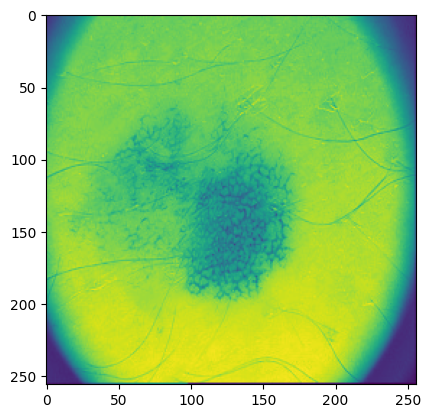

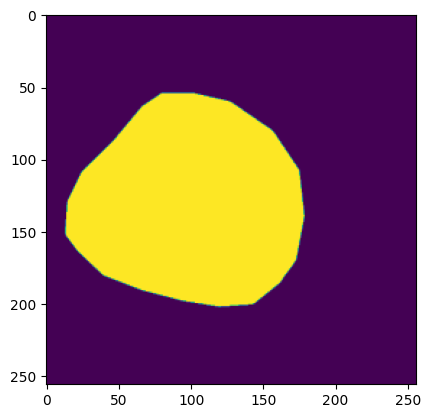

1


In [4]:
batch_size=1
from torch.utils.data import DataLoader
dataloaders = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
}

train_dataloader = dataloaders['train']

inputs = next(iter(train_dataloader))
print(inputs[0].shape)
for xb, yb in train_dataloader:
    plt.imshow(xb[0,0,:,:]); plt.show()
    plt.imshow(yb[0,0,:,:]); plt.show()
    print(yb.size(0))
    break

loss_func = nn.BCEWithLogitsLoss()
#loss_func = nn.CrossEntropyLoss(reduction="sum")
lr = 2e-4
beta1 = 0.5
lr_gen = 2e-4
lr_dis = 5e-5 # half of G’s LR
opt_gen = torch.optim.Adam(model_gen.parameters(), lr=lr_gen, betas=(0.5, 0.999))
opt_dis = torch.optim.Adam(model_dis.parameters(), lr=lr_dis, betas=(0.5, 0.999))
#opt_dis = optim.Adam(model_dis.parameters(), lr=lr, betas=(beta1,0.999))
#opt_gen = optim.Adam(model_gen.parameters(), lr=lr, betas=(beta1,0.999))
real_label = 0.9
fake_label = 0.1
num_epochs = 60
loss_history={"gen": [],"dis": []}
batch_count = 0

def initialize_weights(model):
    classname = model.__class__.__name__.lower()
    
    # Skip PyTorch's built-in nn.Upsample
    if classname == "upsample":
        return
    
    # Only initialize if the layer has 'weight' attribute
    if hasattr(model, 'weight') and model.weight is not None:
        if "conv" in classname:  # Conv & ConvTranspose
            nn.init.normal_(model.weight.data, 0.0, 0.02)
            if hasattr(model, 'bias') and model.bias is not None:
                nn.init.constant_(model.bias.data, 0)

        elif "batchnorm" in classname:
            nn.init.normal_(model.weight.data, 1.0, 0.02)
            if hasattr(model, 'bias') and model.bias is not None:
                nn.init.constant_(model.bias.data, 0)

model_gen.apply(initialize_weights);
model_dis.apply(initialize_weights);

def dice_loss(pred, target, smooth = 1e-5):
    intersection = (pred * target).sum(dim=(2,3))
    union= pred.sum(dim=(2,3)) + target.sum(dim=(2,3))
    dice= 2*(intersection + smooth) / (union+ smooth)
    loss = 1.0 - dice
    return loss.sum(), dice.sum()
def FocalLoss(pred, target):
    alpha=0.25
    gamma=2
    p = torch.sigmoid(pred)
    bce_loss = F.binary_cross_entropy_with_logits(pred, target, reduction="none")
    pt = p * target + (1 - p) * (1 - target)
    loss = bce_loss * ((1 - pt) ** gamma)
    focal_loss = (alpha * (1-pt)**gamma * bce_loss).mean()
    return focal_loss

def loss_func1(pred, target):
    bce = F.binary_cross_entropy_with_logits(pred, target,reduction="mean")
    pred= torch.sigmoid(pred)
    dlv, _ = dice_loss(pred, target)
    loss = bce + dlv
    return loss 
def loss_func2(pred, target):
    bce = F.binary_cross_entropy_with_logits(pred, target,reduction="mean")
    criterion = FocalLoss(pred, target)
    pred= torch.sigmoid(pred)
    dlv, _ = dice_loss(pred, target)
    loss = bce + dlv+criterion
    return loss 
loss_func = nn.BCEWithLogitsLoss()

In [5]:
best_loss = float("inf")   # track best generator loss
best_epoch = 0

for epoch in range(num_epochs):
    print("Epoch" + str(epoch))
    for img, mask in train_dataloader:
        # --------------------------
        # Learning Discriminator
        # --------------------------
        ba_si = mask.size(0)
        model_dis.zero_grad()
        img = img.to(device)
        mask = mask.to(device)

        out_dis = model_dis(mask)[0]
        yb1 = torch.full_like(out_dis, real_label, device=device)       # logits
        loss_r = F.binary_cross_entropy_with_logits(out_dis, yb1)

        noise = img.to(device)
        out_gen = model_gen(noise)
        out_dis = model_dis(out_gen.detach())[0]
        yb2 = torch.full((ba_si,), fake_label, device=device, dtype=torch.float32)
        loss_f = F.binary_cross_entropy_with_logits(out_dis, yb2)

        loss_dis = (loss_r + loss_f)/2
        if loss_dis.item() > 0.4:
            loss_dis.backward()
            opt_dis.step()
        
        # --------------------------
        # Learning Generator
        # --------------------------
        model_gen.zero_grad()
        yb3 = torch.full_like(out_dis, real_label, device=device)
        out_dis = model_dis(out_gen)[0]
        loss_gen = F.binary_cross_entropy_with_logits(out_dis, yb3)

        # segmentation + adversarial
        loss_seg = loss_func2(out_gen, mask)
        loss_total = (loss_seg + 0.1 * loss_gen)

        loss_total.backward()
        opt_gen.step()

        # record losses
        loss_history["gen"].append(loss_total.item())
        loss_history["dis"].append(loss_dis.item())
        batch_count += 1

        if batch_count % 100 == 0:
            print(f"Batch {batch_count}  Gen: {loss_total.item():.4f}  Dis: {loss_dis.item():.4f}")
            print(batch_count, end=" ")

    # --------------------------
    # Save best model weights per epoch
    # --------------------------
    avg_gen_loss = sum(loss_history["gen"][-len(train_dataloader):]) / len(train_dataloader)

    if avg_gen_loss < best_loss:
        best_loss = avg_gen_loss
        best_epoch = epoch
        torch.save({
            "gen_state_dict": model_gen.state_dict(),
            "dis_state_dict": model_dis.state_dict(),
            "opt_gen_state_dict": opt_gen.state_dict(),
            "opt_dis_state_dict": opt_dis.state_dict(),
            "epoch": epoch,
            "loss": best_loss
        }, "best_model.pth")
        print(f"✅ Saved Best Model at Epoch {epoch} with Gen Loss: {best_loss:.4f}")

# --------------------------
# Load best model for testing
# --------------------------
checkpoint = torch.load("best_model.pth", map_location=device)
model_gen.load_state_dict(checkpoint["gen_state_dict"])
model_dis.load_state_dict(checkpoint["dis_state_dict"])
print(f"Loaded Best Model from Epoch {checkpoint['epoch']} with Gen Loss {checkpoint['loss']:.4f}")

Epoch0
Batch 100  Gen: 1.1733  Dis: 0.7294
100 Batch 200  Gen: 1.4474  Dis: 0.3294
200 Batch 300  Gen: 1.5497  Dis: 0.3858
300 Batch 400  Gen: 1.7341  Dis: 0.3714
400 Batch 500  Gen: 1.5344  Dis: 0.3506
500 Batch 600  Gen: 1.5049  Dis: 0.3260
600 Batch 700  Gen: 1.6136  Dis: 0.3637
700 ✅ Saved Best Model at Epoch 0 with Gen Loss: 1.6042
Epoch1
Batch 800  Gen: 1.5357  Dis: 0.3456
800 Batch 900  Gen: 1.4523  Dis: 0.3343
900 Batch 1000  Gen: 1.6232  Dis: 0.3695
1000 Batch 1100  Gen: 1.6056  Dis: 0.3451
1100 Batch 1200  Gen: 2.2601  Dis: 0.3457
1200 Batch 1300  Gen: 1.5714  Dis: 0.3407
1300 Batch 1400  Gen: 1.3987  Dis: 0.3330
1400 ✅ Saved Best Model at Epoch 1 with Gen Loss: 1.5694
Epoch2
Batch 1500  Gen: 1.2495  Dis: 0.3391
1500 Batch 1600  Gen: 1.5038  Dis: 0.3446
1600 Batch 1700  Gen: 1.7731  Dis: 0.3369
1700 Batch 1800  Gen: 1.2415  Dis: 0.3513
1800 Batch 1900  Gen: 0.9620  Dis: 0.3323
1900 Batch 2000  Gen: 1.5057  Dis: 0.3571
2000 Batch 2100  Gen: 0.7518  Dis: 0.3658
2100 ✅ Saved Bes

In [8]:
from torch.utils.data import DataLoader
import os

# path setup
path2models = "d:/2024_pc/skin_cancer_segmentation/models1/"
os.makedirs(path2models, exist_ok=True)

path2weights_gen = os.path.join(path2models, "weights_gen_vessel.pt")
path2weights_dis = os.path.join(path2models, "weights_dis_vessel.pt")

# save best weights
torch.save(model_gen.state_dict(), path2weights_gen)
torch.save(model_dis.state_dict(), path2weights_dis)
print("✅ Generator and Discriminator weights saved successfully!")

✅ Generator and Discriminator weights saved successfully!


torch.Size([1, 256, 256]) torch.FloatTensor tensor(0.7255)
torch.Size([1, 256, 256]) torch.FloatTensor tensor(1.)


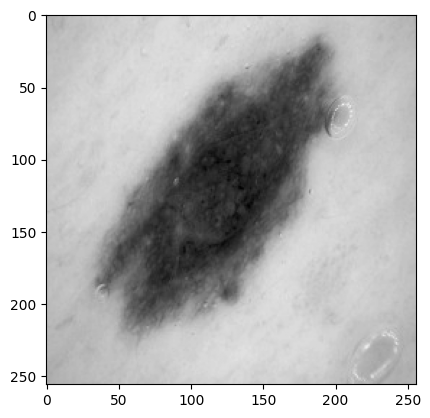

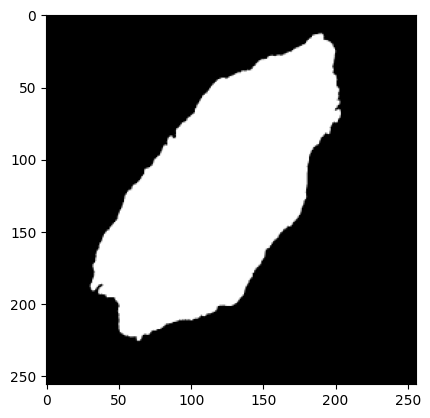

torch.Size([1, 1, 256, 256])


C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mithun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


inference time per image: nan s


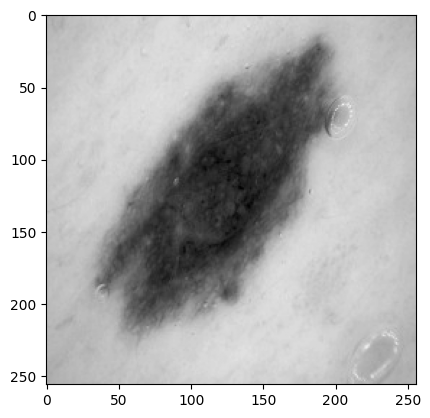

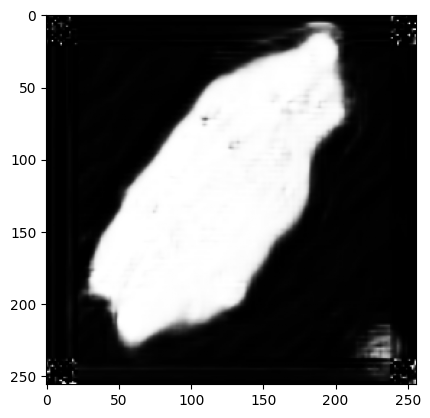

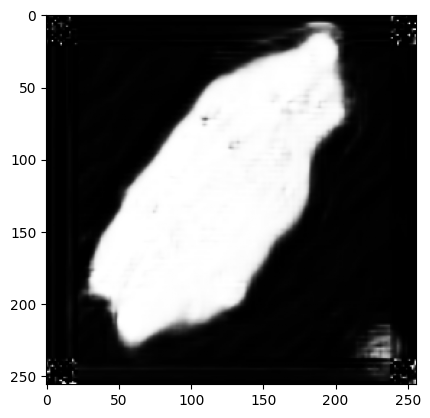

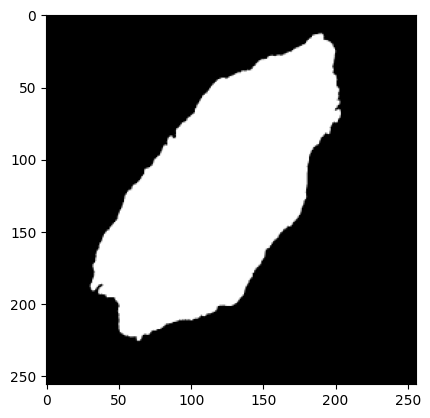

[[43519  2981]
 [    0 19036]]
43519 2981 0 19036
acc= 0.9545135498046875
pre= 0.8646046236998682
sen= 1.0
spe= 0.9358924731182796
F1score= 0.9273865490950722
IOU= 0.8646046236998682
AUC: 0.999


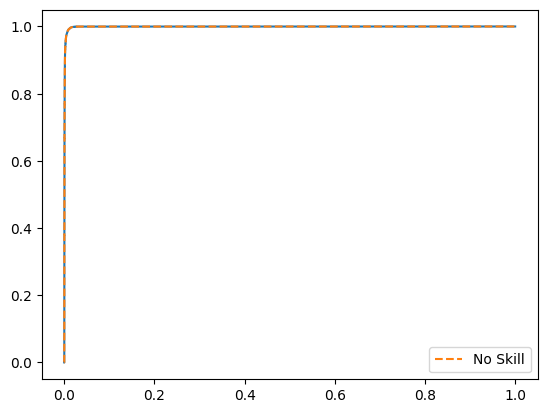

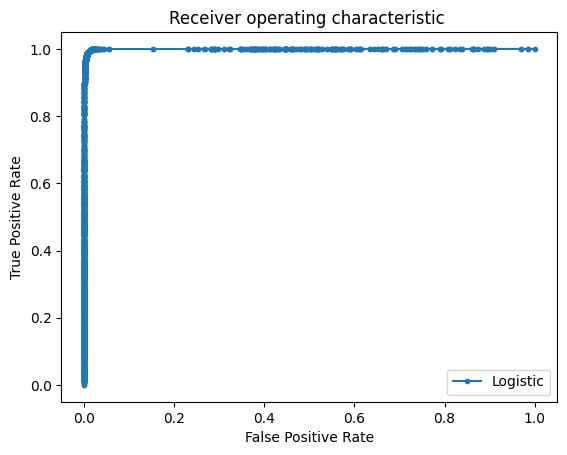

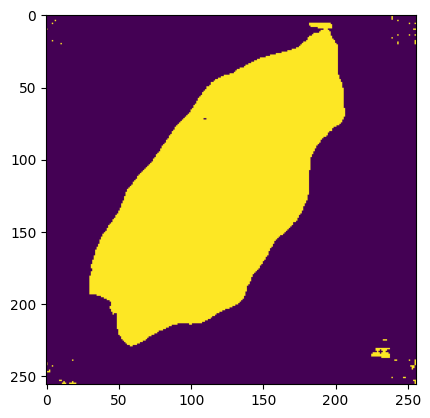

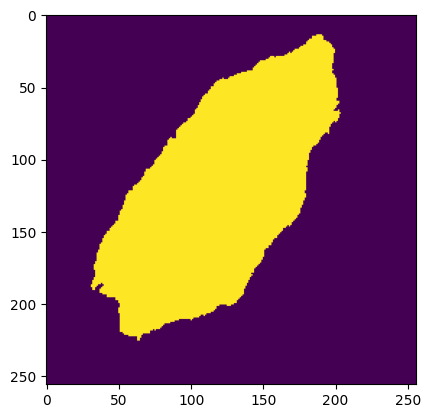

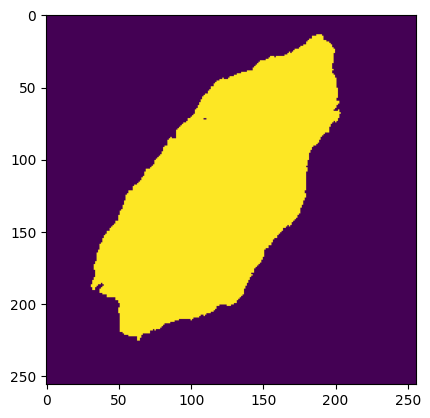

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


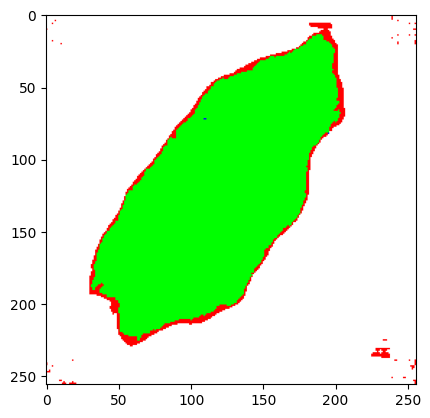

In [9]:
#test_dataset = "d:/2024_pc/skin_cancer_segmentation/ISIC_2016/test_gray/"
#mask_dir_test_2="d:/2024_pc/skin_cancer_segmentation/ISIC_2016/test_mask/"
test_dataset = "d:/2024_pc/skin_cancer_segmentation/ISIC_2016/test_isic_2016/"
mask_dir_test_2="d:/2024_pc/skin_cancer_segmentation/ISIC_2016/test_isic_2016_mask/"
test_fetal_ds1=fetal_dataset(test_dataset,mask_dir_test_2,1, transform=transform_val)
test_img,test_msk1=test_fetal_ds1[0]

#show_img_mask(img, mask)
print(test_img.shape, test_img.type(),torch.max(test_img))
print(test_msk1.shape, test_msk1.type(),torch.max(test_msk1))

test_loader = DataLoader(test_fetal_ds1, batch_size=1, shuffle=True)

#val_dl = dataloaders['val']
inputs = next(iter(test_loader))
plt.figure()
plt.imshow(inputs[0][0,0,:], cmap='gray'); plt.show()
plt.imshow(inputs[1][0,0,:], cmap='gray'); plt.show()
plt.imsave('gray.png',inputs[0][0,0,:], cmap='gray')   
#weights = torch.load('../input/glaucomavesselgandataset/weights_gen_vessel.pt')
weights = torch.load(path2weights_gen)

model_gen.load_state_dict(weights)
model_gen.eval()
import time
elapsed_times=[]
start=time.time()
with torch.no_grad():
    fixed_noise = inputs[0]
    img_fake = model_gen(fixed_noise.to(device)[0].unsqueeze_(0)).detach().cpu()
    img_fake = torch.sigmoid(img_fake)
print(img_fake.shape)
print("inference time per image: %.4f s"%( np.mean(elapsed_times)))  
plt.imshow(inputs[0][0,0,:],cmap='gray'); plt.show()

# Output
fake = img_fake[0,0,:].numpy()
plt.imshow(fake, cmap='gray'); 
#plt.title('Generator output')
plt.figure()
fake1 = (fake-fake.min()) / (fake-fake.min()).max()
plt.imshow(fake1, cmap='gray'); 
plt.imsave('result.png',fake1, cmap='gray') 
#plt.title('Generator output1')
plt.show()
plt.imshow(inputs[1][0,0,:], cmap='gray');# plt.title('Ground Truth'); 
plt.show()
plt.imsave('grountruth.png',inputs[1][0,0,:], cmap='gray')
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y=inputs[1][0,0,:].numpy().astype(int).flatten()
pred=(fake1>0.5).astype(int).flatten()
conf_matrix = confusion_matrix(inputs[1][0,0,:].numpy().astype(int).flatten(), (fake1>0.2).astype(int).flatten())
print(conf_matrix)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

tn, fp, fn, tp = conf_matrix.ravel()
print(tn, fp, fn, tp )
acc=(tp + tn)/ (tp + fn + tn + fp)
print('acc=',acc)
precision= tp/(tp+fp)
print('pre=',precision)
sen=tp/(tp+fn)
print('sen=',sen)
spe=tn/(tn+fp)
print('spe=',spe)
F1score=(2*tp)/(2*tp+fn+fp)
print('F1score=', F1score)

IOU=tp/(tp+fn+fp)
print('IOU=', IOU)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, fake1.flatten())
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, fake1.flatten())
auc = roc_auc_score(y, fake1.flatten())
print('AUC: %.3f' % auc)
plt.plot(fpr, tpr, linestyle='--', label='No Skill')
plt.legend()
plt.figure()
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend()
# show the plot
#plt.show()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()


gen = (fake1>0.5).astype(int)
gt = inputs[1][0,0,:].numpy().astype(int)

plt.imshow(gen); plt.show()
plt.imshow(gt); plt.show();

tp = (gen==1) & (gt==1)
tn = (gen==0) & (gt==0)
fp = (gen==1) & (gt==0)
fn = (gen==0) & (gt==1)
plt.imshow(tp); plt.show()


out = np.zeros((256*256,3))

out[(tp==1).flatten(),1] = 255
out[(tn==1).flatten(),0] = 255
out[(tn==1).flatten(),1] = 255
out[(tn==1).flatten(),2] = 255
out[(fp==1).flatten(),0] = 255
out[(fn==1).flatten(),2] = 255

out_final = out.reshape((256,256,3))

plt.imshow(out_final); plt.show()
plt.imsave('compare.png',np.uint8(out_final))

In [11]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ---------------------------
# Function to compute metrics from confusion matrix
# ---------------------------
def compute_metrics(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true.flatten(), y_pred.flatten(), labels=[0,1])
    tn, fp, fn, tp = conf_matrix.ravel()

    acc  = (tp + tn) / (tp + tn + fp + fn + 1e-8)
    pre  = tp / (tp + fp + 1e-8)
    sen  = tp / (tp + fn + 1e-8)   # recall / sensitivity
    spe  = tn / (tn + fp + 1e-8)   # specificity
    f1   = (2 * tp) / (2 * tp + fp + fn + 1e-8)
    iou  = tp / (tp + fp + fn + 1e-8)
    dice = (2 * tp) / (2 * tp + fp + fn + 1e-8)  # Dice = F1 in binary segmentation

    return acc, pre, sen, spe, f1, iou, dice

# ---------------------------
# Evaluate entire test set
# ---------------------------
def evaluate_model(model, dataloader, device, threshold=0.5):
    model.eval()
    metrics_list = []

    with torch.no_grad():
        for img, mask in dataloader:
            img = img.to(device)
            mask = mask.squeeze().cpu().numpy().astype(int)   # ground truth [H,W]

            # forward pass
            pred = torch.sigmoid(model(img)).squeeze().cpu().numpy()

            # binarize prediction
            pred_bin = (pred > threshold).astype(int)

            # compute metrics
            results = compute_metrics(mask, pred_bin)
            metrics_list.append(results)

    # Average over dataset
    metrics_array = np.array(metrics_list)
    mean_metrics = metrics_array.mean(axis=0)

    return mean_metrics, metrics_array

# ---------------------------
# Run evaluation
# ---------------------------
test_loader = DataLoader(test_fetal_ds1, batch_size=1, shuffle=False)

mean_metrics, all_metrics = evaluate_model(model, test_loader, device, threshold=0.5)

acc, pre, sen, spe, f1, iou, dice = mean_metrics
print(f"Average Metrics on Test Set:")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {pre:.4f}")
print(f"Sensitivity  : {sen:.4f}")
print(f"Specificity  : {spe:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"IoU          : {iou:.4f}")
print(f"Dice Score   : {dice:.4f}")

Average Metrics on Test Set:
Accuracy     : 0.9716
Precision    : 0.8385
Sensitivity  : 0.8848
Specificity  : 0.9771
F1 Score     : 0.8379
IoU          : 0.7495
Dice Score   : 0.8379
